In [1]:
# always import these 3 for pandas and numpy

import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
# Reading a CSV file

df= pd.read_csv("dataset.csv")
df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106


In [6]:
# calculating distinct values of a column

n = len(pd.unique(df['HotelID'])) 
  
print("No.of.unique values :",  
      n)

No.of.unique values : 100


In [19]:
# Calculating Distinct value of a column based on other column. Here distinct value of stay_date was based on HotelID

n1= df.groupby(['HotelID'])
n2= n1.apply(lambda x: len(x['stay_date'].unique()))
n2

HotelID
x10106    90
x105      71
x11082    90
x12056    56
x12144    76
          ..
x8468     90
x8616     82
x8823     60
x8832     79
x9998     66
Length: 100, dtype: int64

In [36]:
# calculating average of a column based on another column. Here the num_days column is based on group by HotelID column.
average= df.groupby('HotelID', as_index= 'false')['num_days'].mean()
avg1 = average.round()
avg1

HotelID
x10106    131.0
x105      153.0
x11082    121.0
x12056    238.0
x12144    153.0
          ...  
x8468     139.0
x8616     164.0
x8823     179.0
x8832     152.0
x9998     164.0
Name: num_days, Length: 100, dtype: float64

In [37]:
median = df.groupby('HotelID', as_index='false')['num_days'].median()
median

HotelID
x10106    126
x105      151
x11082    114
x12056    237
x12144    151
         ... 
x8468     134
x8616     161
x8823     177
x8832     146
x9998     157
Name: num_days, Length: 100, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135F1704C48>]],
      dtype=object)

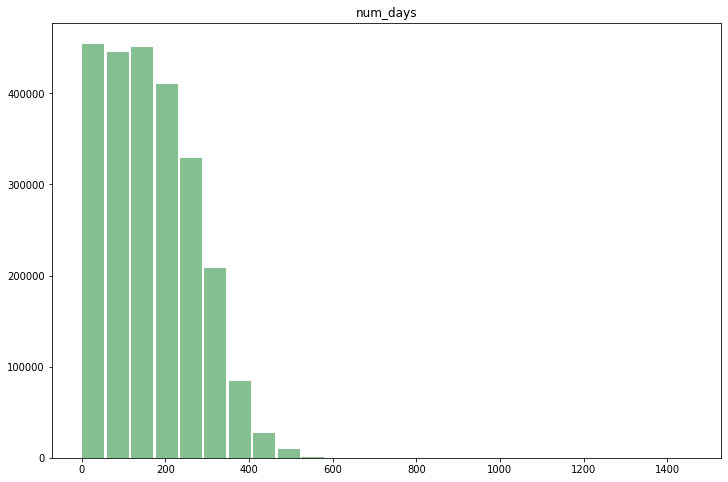

In [40]:
# Histogram of all the rows of a column. Here the column is num_days.

df.hist(column='num_days', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


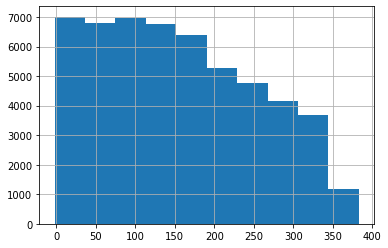

In [41]:
# Histogram of specific rows of a specific column. Here the column is num_days an the row is x11082 and x36.

df[df.HotelID.isin(['x11082', 'x36'])]['num_days'].hist()

In [74]:
#finding the top 10 of the average of a particular column.

df2 = df[df['as_of_date'] == '2020-06-01']
averageDf = df2.groupby('HotelID', as_index=False)['r2'].mean()
averageDf.sort_values(by=['r2'], ascending=False).head(10)

,HotelID,r2
39,x38,862.857143
45,x46,715.642857
38,x37,370.035714
35,x36,191.409836
7,x14287,122.065574
78,x65754,105.721311
9,x14690,94.032787
14,x1617,90.885246
82,x65807,90.786885
4,x12144,80.442623


In [81]:
# plotting the time series graph of the top 10 values in two column.
import plotly.express as px
df3 = averageDf.sort_values(by=['r2'], ascending=False).head(10)
for hotel in list(df3['HotelID']):
    fig = px.line(df2[df2['HotelID'] == hotel], x='stay_date', y=['r1','r2'], title='Hotel_id')
    fig.show()